# Bitcoin Price Prediction

The goal of this case study is to use classification based models to predict the movement of Bitcoin price in the the following day depending on selected features. This code is modified from a textbook's sample code. The original codes has a list of serious mistakes and correcting those mistakes is part of this assignment.

## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1) 
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.2. Preparing classification data](#3.2)
    * [4.3. Feature Engineering-Constructing Technical Indicators](#3.3)
    * [4.4.Data Visualisation](#3.4)
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3) 
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
* [8. Backtesting](#7)     


<a id='0'></a>
# 1. Problem Definition

The problem of predicting a buy or sell signal for a trading strategy is defined in the
classification framework, where the predicted variable has a value of 1 for buy and 0
for sell. Data can be found also at: https://www.kaggle.com/mczielinski/bitcoin-historical-data

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [91]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from lightgbm import LGBMClassifier


<a id='1.2'></a>
## 2.2. Loading the Data

#### <font color='red'>Note : Due to limit in the github for the data size, a sample of the data has been loaded in the jupyter notebook repository of this book. However, all the subsequent results in this jupyter notebook is with actual data (~150MB) under https://www.kaggle.com/mlfinancebook/bitstamp-bicoin-minutes-data. You should load the full data in case you want to reproduce the results. </font> 

In [145]:
# load dataset
dataset = pd.read_csv('bitstamp_cleaned.csv')

In [94]:
#Disable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [147]:
# shape
dataset['DateTime'] = pd.to_datetime(dataset['Unix_Timestamp'],unit='s')
dataset = dataset.set_index('DateTime')
dataset.shape

(3330541, 8)

In [148]:
# peek at data
set_option('display.width', 100)
dataset.head(20)

,Unix_Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
DateTime,,,,,,,,
2011-12-31 07:52:00,1325317920,4.39,4.39,4.39,4.39,0.46,2.00,4.39
2011-12-31 15:50:00,1325346600,4.39,4.39,4.39,4.39,48.00,210.72,4.39
2011-12-31 16:59:00,1325350740,4.50,4.57,4.50,4.57,37.86,171.38,4.53
2011-12-31 17:00:00,1325350800,4.58,4.58,4.58,4.58,9.00,41.22,4.58
2012-01-01 04:16:00,1325391360,4.58,4.58,4.58,4.58,1.50,6.88,4.58
2012-01-01 15:28:00,1325431680,4.84,4.84,4.84,4.84,10.00,48.40,4.84
2012-01-01 22:45:00,1325457900,5.00,5.00,5.00,5.00,10.10,50.50,5.00
2012-01-02 20:04:00,1325534640,5.00,5.00,5.00,5.00,19.05,95.24,5.00
2012-01-03 11:45:00,1325591100,5.32,5.32,5.32,5.32,2.42,12.87,5.32


In [149]:
# describe data
set_option('display.precision', 2)
dataset.describe()

,Unix_Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.33e+06,3.33e+06,3.33e+06,3.33e+06,3.33e+06,3.33e+06,3.33e+06,3.33e+06
mean,1.49e+09,4.06e+03,4.06e+03,4.05e+03,4.06e+03,9.62e+00,3.07e+04,4.06e+03
std,6.98e+07,4.10e+03,4.11e+03,4.10e+03,4.10e+03,3.16e+01,1.07e+05,4.10e+03
min,1.33e+09,3.80e+00,3.80e+00,1.50e+00,1.50e+00,0.00e+00,0.00e+00,3.80e+00
25%,1.43e+09,4.22e+02,4.22e+02,4.21e+02,4.22e+02,3.86e-01,3.83e+02,4.22e+02
50%,1.50e+09,2.39e+03,2.39e+03,2.39e+03,2.39e+03,1.94e+00,2.94e+03,2.39e+03
75%,1.55e+09,7.58e+03,7.59e+03,7.58e+03,7.58e+03,7.43e+00,1.93e+04,7.58e+03
max,1.60e+09,1.97e+04,1.97e+04,1.96e+04,1.97e+04,5.85e+03,1.04e+07,1.97e+04


<a id='3'></a>
# 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning --- Time Series Aggregation

The dataset contains the per minute trading data of bitcoin. However, there are many missing time slots, which means within those minutes, there were no trading volume. This makes our time series data not continous in terms of time.
The easist approach is to first aggregate data into daily level (or other fixed duration). Then, we fill up the slots with no data with previous closing price and volume of 0. This data pre-processing step is quite common for transactional data for trading.

In [150]:
def aggregate_by_time(freq_slot: str, dataset):
    aggregated_result = pd.DataFrame()
    aggregated_result['Open'] = dataset.Open.resample(freq_slot).first()
    aggregated_result['High'] = dataset.High.resample(freq_slot).max()
    aggregated_result['Low'] = dataset.Low.resample(freq_slot).min()
    aggregated_result['Close'] = dataset.Close.resample(freq_slot).last()
    aggregated_result['Volume_(BTC)'] = dataset['Volume_(BTC)'].resample(freq_slot).sum()
    aggregated_result['Volume_(Currency)'] = dataset['Volume_(Currency)'].resample(freq_slot).sum()
    aggregated_result['Weighted_Price'] = aggregated_result['Volume_(Currency)'] / aggregated_result['Volume_(BTC)']

    # fill the missing close/open/high/low prices with previous close price
    aggregated_result['Close'].ffill(inplace=True)
    for col in ['Open', 'High', 'Low',]:
        aggregated_result[col].fillna(aggregated_result['Close'], inplace=True)
    for col in ['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']:
        aggregated_result[col].fillna(0, inplace=True)
    return aggregated_result

# You can play with different time slots to aggregate results
# Examples like 15T, 1H, 2H, 4H, 6H, 12H, 1D, 2D, 3D, 4D, 5D, 1W, 2W, 3W, 1M
# 15T is 15 minutes, 1H is 1 hour, 1D is 1 day, 1W is 1 week, 1M is 1 month
dataset = aggregate_by_time('1D', dataset)
dataset.head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
DateTime,,,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.32,425.32,4.46
2012-01-01,4.58,5.00,4.58,5.00,21.60,105.78,4.90
2012-01-02,5.00,5.00,5.00,5.00,19.05,95.24,5.00
2012-01-03,5.32,5.32,5.14,5.29,88.04,464.81,5.28
2012-01-04,4.93,5.57,4.93,5.57,107.23,568.08,5.30
2012-01-05,5.72,6.65,5.72,6.65,94.80,587.73,6.20
2012-01-06,6.65,6.90,6.00,6.00,33.88,222.81,6.58
2012-01-07,6.80,6.80,6.80,6.80,0.30,2.01,6.80
2012-01-08,6.90,7.00,6.90,7.00,5.00,34.60,6.92


In [151]:
#Checking for any null values and removing the null values'''
print('Null Values =', dataset.isnull().values.any())

Null Values = False


This confirms that we have filled up all time slots and replaced missing values in those slots with valid numbers

<a id='3.2'></a>
## 4.2. Preparing the data for classification

We attach a label to each movement: 
* **1** if the return is positive (or close today <= close tomorrow)
* **0** if the return is negative (or close today > close tomorrow)

In [152]:
# predict return after x days
def return_in_X_days(x, dataset):
    # dataset['Y'] = np.where(dataset['Close'] > dataset['Close'].shift(-1), 0.0, 1.0)
    dataset['Y'] = np.where(dataset['Close'] > dataset['Close'].shift(-1), 0.0, 1.0)
    return dataset

dataset = return_in_X_days(5, dataset)

In [153]:
dataset.head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Y
DateTime,,,,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.32,425.32,4.46,1.0
2012-01-01,4.58,5.00,4.58,5.00,21.60,105.78,4.90,1.0
2012-01-02,5.00,5.00,5.00,5.00,19.05,95.24,5.00,1.0
2012-01-03,5.32,5.32,5.14,5.29,88.04,464.81,5.28,1.0
2012-01-04,4.93,5.57,4.93,5.57,107.23,568.08,5.30,1.0
2012-01-05,5.72,6.65,5.72,6.65,94.80,587.73,6.20,0.0
2012-01-06,6.65,6.90,6.00,6.00,33.88,222.81,6.58,1.0
2012-01-07,6.80,6.80,6.80,6.80,0.30,2.01,6.80,1.0
2012-01-08,6.90,7.00,6.90,7.00,5.00,34.60,6.92,0.0


<a id='3.3'></a>
## 4.3. Feature Engineering

We begin by the constructing a dataset that contains the predictors which will be used to make the predictions, and the output variable.

The current Data of the bicoin consists of date, open, high, low, close and Volume. Using this data we calculate the following  technical indicators:
* **Moving Average** : A moving average provides an indication of the trend of the price movement by cut down the amount of "noise" on a price chart. 
* **Stochastic Oscillator %K and %D** : A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. %K and %D are slow and fast indicators.
* **Relative Strength Index(RSI)** :It is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. 
* **Rate Of Change(ROC)**: It is a momentum oscillator, which measures the percentage change between the current price and the n period past price. 
* **Momentum (MOM)** : It is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing.
* **Return over X days**: It calculates the return over the past X days.

In [154]:
# calculation of exponential moving average
# def EMA(df, n):
#     EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
#     return EMA
# dataset['EMA10'] = EMA(dataset, 10)
# dataset['EMA30'] = EMA(dataset, 30)
# dataset['EMA200'] = EMA(dataset, 200)
# dataset.head()

# calculation of rate of change
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
dataset['ROC10'] = ROC(dataset['Close'], 10)
dataset['ROC30'] = ROC(dataset['Close'], 30)

# Calculation of price momentum
# def MOM(df, n):   
#     MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
#     return MOM
# dataset['MOM10'] = MOM(dataset['Close'], 10)
# dataset['MOM30'] = MOM(dataset['Close'], 30)

# calculation of relative strength index
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(com=period-1, adjust=False).mean() / \
    d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)
dataset['RSI10'] = RSI(dataset['Close'], 10)
dataset['RSI30'] = RSI(dataset['Close'], 30)
dataset['RSI200'] = RSI(dataset['Close'], 200)

# calculation of stochastic osillator.

# def STOK(close, low, high, n): 
#     STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
#     return STOK

# def STOD(close, low, high, n):
#     STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
#     STOD = STOK.rolling(3).mean()
#     return STOD

# dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
# dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
# dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
# dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
# dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
# dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

#calculation of moving average
# def MA(df, n):
#     MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
#     return MA
# dataset['MA10'] = MA(dataset, 10)
# dataset['MA30'] = MA(dataset, 30)
# dataset['MA200'] = MA(dataset, 200)

# # Create signals
# conditions  = [(dataset['MA10'] > dataset['MA30']) & (dataset['MA10'].shift(1) < dataset['MA30'].shift(1) ), 
#     (dataset['MA10'] < dataset['MA30']) & (dataset['MA10'].shift(1) > dataset['MA30'].shift(1)), 
#     (dataset['MA10'] > dataset['MA30']) & (dataset['MA10'].shift(1) > dataset['MA30'].shift(1)) | (dataset['MA10'] < dataset['MA30']) & (dataset['MA10'].shift(1) < dataset['MA30'].shift(1))]
# choices     = [1, -1, 0 ]
# dataset['signal'] = np.select(conditions, choices, default=np.nan)

def return_over_X_days(x, df):
    df = df.pct_change(x)
    return df

dataset['return_last_day'] = return_over_X_days(1, dataset['Close'])
for i in range(2, 5):
    dataset[f'return_over_last_{i}_day'] = return_over_X_days(i, dataset['Close'])

# calculation of moving average of return
def MA(df, n):
    MA = pd.Series(df['return_last_day'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA2'] = MA(dataset, 2)
dataset['MA3'] = MA(dataset, 3)
dataset['MA4'] = MA(dataset, 4)
dataset['MA7'] = MA(dataset, 7)

In [155]:
dataset = dataset.dropna(axis=0)

In [156]:
dataset.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Y,ROC10,ROC30,...,RSI30,RSI200,return_last_day,return_over_last_2_day,return_over_last_3_day,return_over_last_4_day,MA2,MA3,MA4,MA7
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-09-10,10221.76,10495.75,10220.00,10342.59,10223.19,1.06e+08,10341.18,1.0,-13.26,-10.57,...,46.48,51.61,1.07e-02,2.16e-02,-3.33e-03,8.03e-03,1.07e-02,-9.73e-04,2.12e-03,2.73e-03
2020-09-11,10341.38,10409.44,10200.50,10393.04,5245.74,5.40e+07,10300.48,1.0,-8.82,-11.87,...,46.90,51.67,4.88e-03,1.57e-02,2.66e-02,1.53e-03,7.80e-03,8.79e-03,4.90e-04,-7.35e-04
2020-09-12,10400.46,10482.42,10275.00,10443.33,2509.24,2.60e+07,10372.07,0.0,2.79,-11.35,...,47.32,51.73,4.84e-03,9.74e-03,2.06e-02,3.15e-02,4.86e-03,6.82e-03,7.80e-03,3.91e-03
2020-09-13,10446.40,10576.78,10214.90,10334.78,4325.11,4.48e+07,10350.01,0.0,-1.16,-12.80,...,46.50,51.59,-1.04e-02,-5.61e-03,-7.55e-04,9.97e-03,-2.78e-03,-2.26e-04,2.51e-03,1.12e-03
2020-09-14,10338.82,10338.82,10332.37,10332.37,1.29,1.33e+04,10332.43,1.0,1.62,-13.28,...,46.48,51.59,-2.33e-04,-1.06e-02,-5.84e-03,-9.88e-04,-5.31e-03,-1.93e-03,-2.28e-04,-5.47e-04


<a id='3.4'></a>
## 4.4. Data Visualization

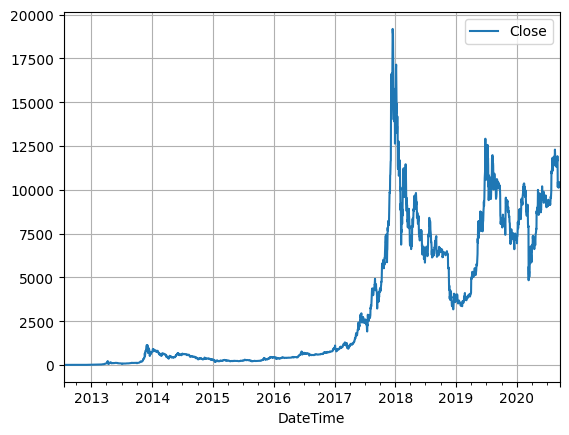

In [157]:
dataset[['Close']].plot(grid=True)
plt.show()

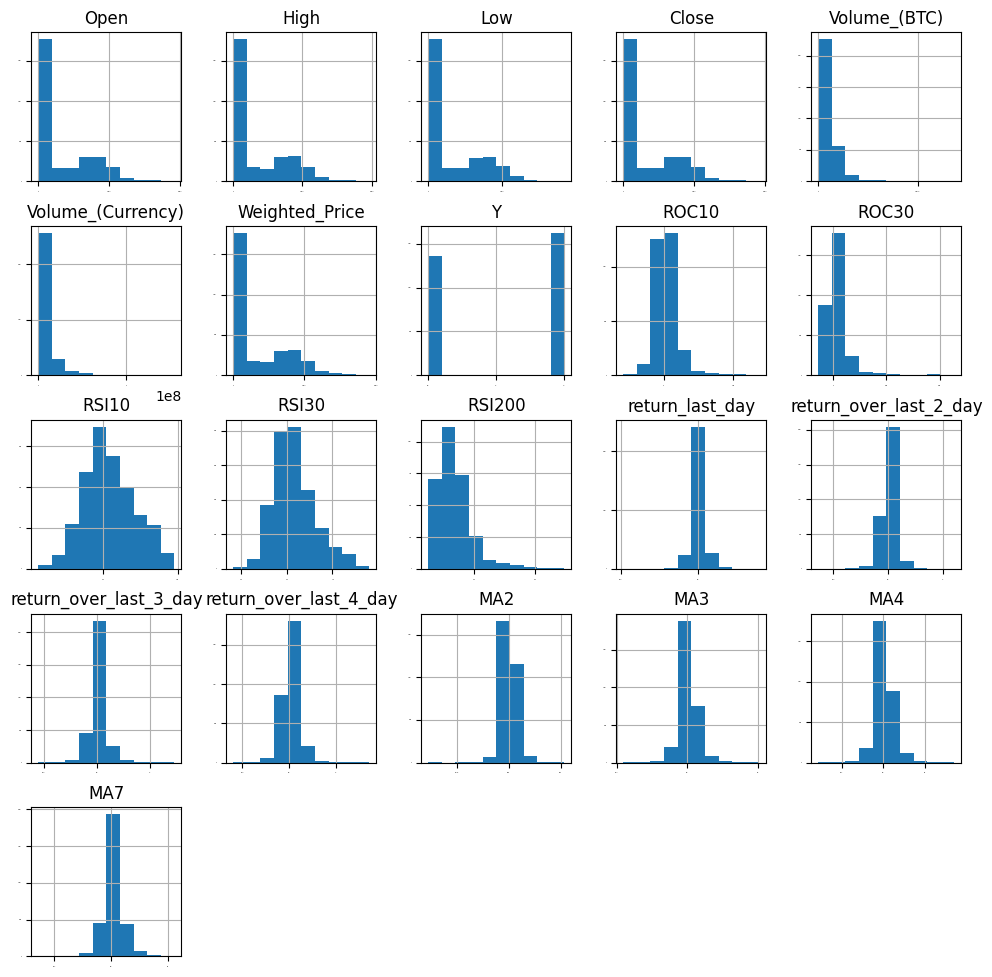

In [159]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

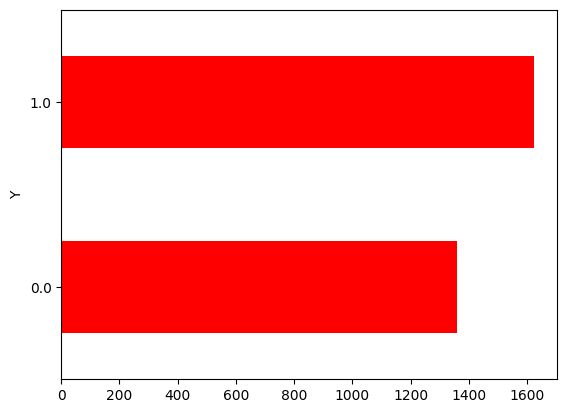

Y
0.0    1358
1.0    1623
dtype: int64


In [160]:
fig = plt.figure()
plot = dataset.groupby(['Y']).size().plot(kind='barh', color='red')
plt.show()
print(dataset.groupby(['Y']).size())

There are more days of return being positive than negative. In fact, only 45.55% is down. So if later our classification accuracy is around 55%, it means it completely does not work.

<Axes: title={'center': 'Correlation Matrix'}>

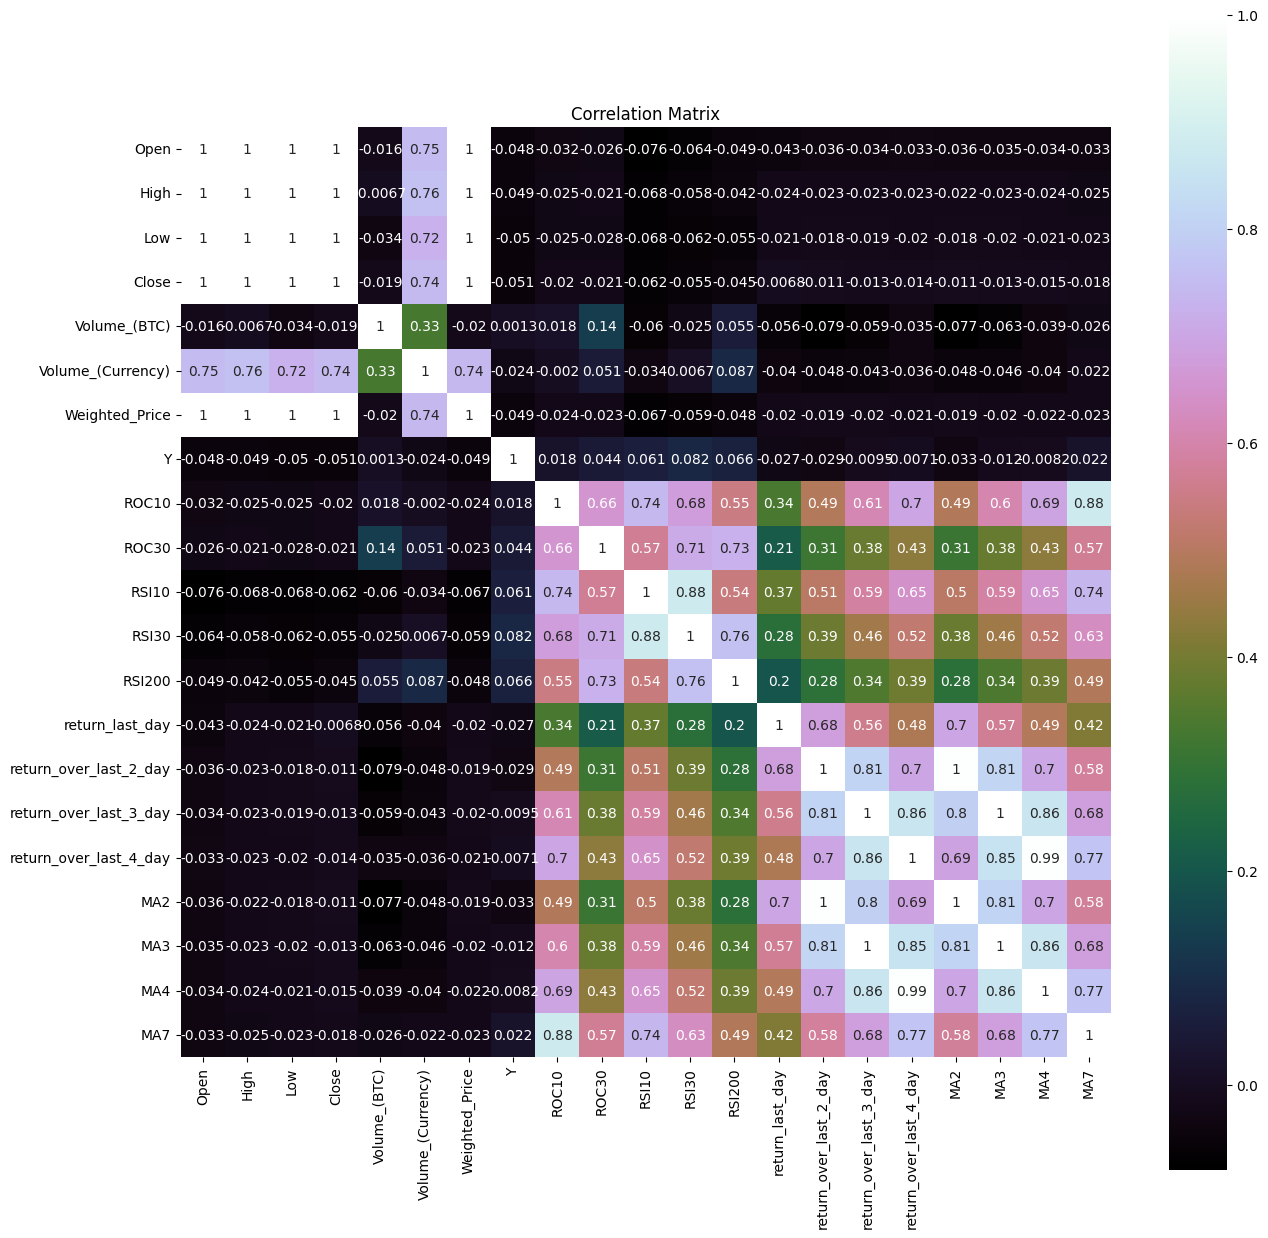

In [161]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

We split the dataset into 80% training set and 20% test set.

In [162]:
# split out validation dataset for the end
Y= dataset["Y"]
X = dataset.loc[:, dataset.columns != 'Y']
Xs = []
Ys = []
look_back = 10
features_count = len(X.columns)
for i in range(look_back, len(X)):
    Xs.append(X.iloc[i - look_back: i].values)
    Ys.append(Y.iloc[i])

Xs, Ys = np.array(Xs), np.array(Ys)
X_train = Xs[:int(Xs.shape[0] * 0.8)]
Y_train = Ys[:int(Ys.shape[0] * 0.8)]
X_test = Xs[int(Xs.shape[0] * 0.8):]
Y_test = Ys[int(Ys.shape[0] * 0.8):]

print("x train shape: ", X_train.shape)
print("y train shape: ", Y_train.shape)
print("x test shape: ", X_test.shape)
print("y test shape: ", Y_test.shape)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print("after flatten x train shape: ", X_train.shape)
print("after flatten x test shape: ", X_test.shape)
features_count


x train shape:  (2376, 10, 20)
y train shape:  (2376,)
x test shape:  (595, 10, 20)
y test shape:  (595,)
after flatten x train shape:  (2376, 200)
after flatten x test shape:  (595, 200)


20

<a id='4.2'></a>
## 5.2. Normalize input data

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(X_train)
scaled_test_data = scaler.transform(X_test)

<a id='4.3'></a>
## 5.3. Test Options and Evaluation Metrics


In [199]:
# test options for classification
#scoring = 'accuracy'
scoring = 'precision'
# scoring = 'recall'
# scoring ='neg_log_loss'
# scoring = 'roc_auc'

<a id='4.4'></a>
## 5.4. Compare Models and Algorithms

In order to know which algorithm technic is the best for our strategy, we evaluate following non linear different methods. We compare their performance using k-fold cross validation. Based on the validation results, we choose the best model.

<a id='4.4.1'></a>
### 5.4.1. Models

In [113]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

#Neural Network"
models.append(('NN', MLPClassifier(hidden_layer_sizes=(5,3),activation='relu',solver='sgd'))) # replace by NN with 2 hidden layer, 5 neurons, 3 neurons each, relu activation, SGD optimizer. 
#(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
#learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
# momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
#n_iter_no_change=10, max_fun=15000)[source]¶

# Ensable Models 
# Boosting methods
# models.append(('AB', AdaBoostClassifier()))
#models.append(('GBM', GradientBoostingClassifier())) # replace by LightGBM with reasonable parameters
models.append(('LGBM', LGBMClassifier(learning_rate=0.01, objective='cross_entropy')))

# Bagging methods
models.append(('RF', RandomForestClassifier()))

Define k-fold training process for each model. Use time series split during k-fold validation

In [114]:
from sklearn.model_selection import TimeSeriesSplit
def kfold_training(model, X, Y):
    tscv = TimeSeriesSplit(n_splits=5)
    cv_results = cross_val_score(model, X, Y, cv=tscv, scoring=scoring)
    return cv_results

In [115]:
results = []
names = []
for name, model in models:
    cv_results = kfold_training(model, X_train, Y_train)
    print("accuracy of ", name, "is", cv_results)
    results.append(cv_results.mean())
    names.append(name)

accuracy of  LR is [0.48104265 0.51895735 0.492891   0.49052133 0.5       ]
accuracy of  KNN is [0.44312796 0.48578199 0.54028436 0.52606635 0.46919431]
accuracy of  CART is [0.4478673  0.50473934 0.50473934 0.50473934 0.48104265]
accuracy of  NB is [0.49763033 0.52369668 0.39336493 0.52606635 0.48104265]
accuracy of  NN is [0.49763033 0.50947867 0.39099526 0.45734597 0.53791469]
accuracy of  LGBM is [0.52843602 0.49763033 0.47156398 0.53317536 0.51895735]
accuracy of  RF is [0.49526066 0.51895735 0.41706161 0.51658768 0.47630332]


Using Keras API to create an LSTM model

In [117]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# depending on the versioning of your Python, you may need one of the following comments to load packages
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
# from keras.utils import to_categorical as to_categorical
from tensorflow.keras.utils import to_categorical

def create_model(neurons, input_shape, optimizer='adam'):
    # fill in here
    model = Sequential()
    model.add(LSTM(neurons[0], input_shape=input_shape, return_sequences=True))
    model.add(LSTM(neurons[1]))
    model.add(Dense(neurons[2],activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

scaled_train_data_lstm = np.reshape(scaled_train_data, (-1, look_back, features_count))
scaled_test_data_lstm = np.reshape(scaled_test_data, (-1, look_back, features_count))
Y_train_cat = to_categorical(Y_train)
kfold = TimeSeriesSplit(n_splits=5)
fold_no = 1
acc = []
input_shape = scaled_train_data_lstm.shape[1:]
for train, test in kfold.split(scaled_train_data_lstm, Y_train_cat):
    
    # fill in the function call below
    model = create_model((128, 64, 100),input_shape)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    fold_no += 1
    model.fit(scaled_train_data_lstm[train], Y_train_cat[train], epochs=5, batch_size=4)
    result = model.evaluate(scaled_train_data_lstm[test], Y_train_cat[test], verbose=-1, return_dict=True)
    print(result)
    acc.append(result['accuracy'])
results.append(sum(acc) / len(acc))
names.append("LSTM")

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
107/107 [==============================] - 8s 20ms/step - loss: 0.6783 - accuracy: 0.6000
Epoch 2/5
107/107 [==============================] - 2s 23ms/step - loss: 0.6782 - accuracy: 0.6024
Epoch 3/5
107/107 [==============================] - 3s 29ms/step - loss: 0.6725 - accuracy: 0.6024
Epoch 4/5
107/107 [==============================] - 3s 23ms/step - loss: 0.6726 - accuracy: 0.5812
Epoch 5/5
107/107 [==============================] - 3s 26ms/step - loss: 0.6730 - accuracy: 0.6024
{'loss': 0.6987159252166748, 'accuracy': 0.5023696422576904}
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
212/212 [==============================] - 10s 20ms/step - loss: 0.6885 - accuracy: 0.5277
Epoch 2/5
212/212 [==============================] - 6s 27ms/step - loss: 0.6843 - accuracy: 0.5679
Epoch 3/5
212/212 [=========================

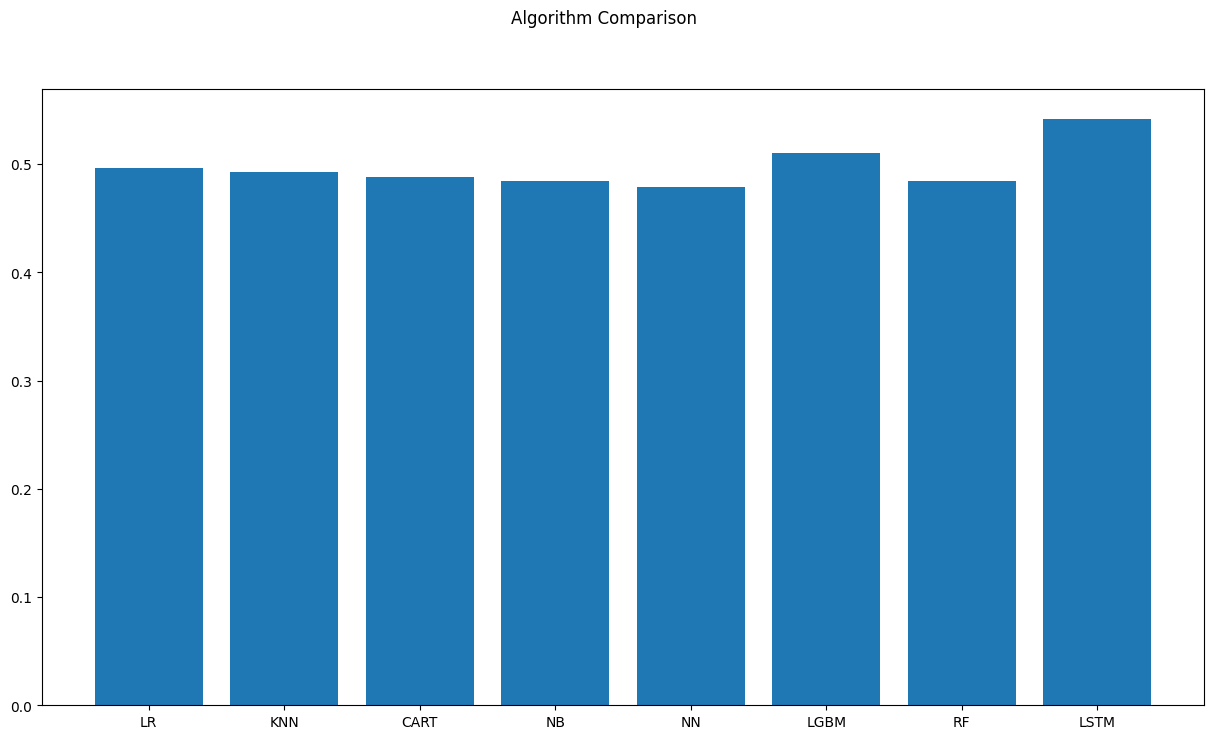

In [118]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
# plot bar graph
plt.bar(names, results)
fig.set_size_inches(15,8)
plt.show()

<a id='5'></a>
# 6. Model Tuning and Grid Search

LSTM is selected for the grid search as it is one of the best models out of all.

In [120]:
# fill in the missing right-hand-side to show that you know how to tune LSTM
# Grid Search: LSTM classifier
from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier

#hidden_layer_sizes = [(128, 64, 100), (256,100,100)]
#hidden_layer_sizes = [(128, 64), (256,100)]
hidden_layer_sizes = [(128, 64, 100), (256,100,100)]
input_shape = [scaled_train_data_lstm.shape[1:]]
param_dict = dict(neurons=hidden_layer_sizes, input_shape=input_shape)

model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=10)

grid = GridSearchCV(estimator=model, param_grid=param_dict, cv=5, n_jobs=-1)
grid_result = grid.fit(scaled_train_data_lstm, Y_train_cat)


Epoch 1/5
254/254 [==============================] - 18s 49ms/step - loss: 0.6901 - accuracy: 0.5428
Epoch 2/5
254/254 [==============================] - 12s 49ms/step - loss: 0.6883 - accuracy: 0.5452
Epoch 3/5
254/254 [==============================] - 12s 48ms/step - loss: 0.6874 - accuracy: 0.5456
Epoch 4/5
254/254 [==============================] - 11s 44ms/step - loss: 0.6877 - accuracy: 0.5479
Epoch 5/5
254/254 [==============================] - 11s 45ms/step - loss: 0.6864 - accuracy: 0.5507


In [121]:
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.550690 using {'input_shape': (10, 20), 'neurons': (256, 100, 100)}
#2 0.547929 (0.052945) with: {'input_shape': (10, 20), 'neurons': (128, 64, 100)}
#1 0.550690 (0.052131) with: {'input_shape': (10, 20), 'neurons': (256, 100, 100)}


<a id='6'></a>
# 7. Finalise the Model

Finalizing the model with best parameters found during tuning step.

<a id='6.1'></a>
## 7.1. LSTM Results on the Test Dataset

In [220]:
# to save time
def create_model(neurons, input_shape, optimizer='adam'):
    # fill in here
    model = Sequential()
    model.add(LSTM(neurons[0], input_shape=input_shape, return_sequences=True))
    model.add(LSTM(neurons[1]))
    model.add(Dense(neurons[2],activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
scaled_train_data_lstm = np.reshape(scaled_train_data, (-1, look_back, features_count))
scaled_test_data_lstm = np.reshape(scaled_test_data, (-1, look_back, features_count))
Y_train_cat = to_categorical(Y_train)

In [221]:
# prepare model
model = create_model([256, 100, 100], (look_back, features_count), 'adam')
#model = create_model([128, 64, 100], (look_back, features_count), 'adam')
model.fit(scaled_train_data_lstm, Y_train_cat, epochs=5, batch_size=8, class_weight={0:1, 1:1})

Epoch 1/5
297/297 [==============================] - 16s 41ms/step - loss: 0.6925 - accuracy: 0.5438
Epoch 2/5
297/297 [==============================] - 10s 35ms/step - loss: 0.6888 - accuracy: 0.5421
Epoch 3/5
297/297 [==============================] - 12s 40ms/step - loss: 0.6883 - accuracy: 0.5417
Epoch 4/5
297/297 [==============================] - 13s 43ms/step - loss: 0.6879 - accuracy: 0.5396
Epoch 5/5
297/297 [==============================] - 12s 42ms/step - loss: 0.6866 - accuracy: 0.5446


In [222]:
# estimate accuracy on validation set
LSTM_predictions = model.predict(scaled_test_data_lstm)
LSTM_predictions = np.argmax(LSTM_predictions, axis=1)
Y_test_cat = to_categorical(Y_test)
Y_test_cat = np.argmax(Y_test_cat, axis=1)
print(accuracy_score(Y_test_cat, LSTM_predictions))
print(confusion_matrix(Y_test_cat, LSTM_predictions))
print(classification_report(Y_test_cat, LSTM_predictions))

19/19 [==============================] - 1s 18ms/step
0.5025210084033613
[[244  31]
 [265  55]]
              precision    recall  f1-score   support

           0       0.48      0.89      0.62       275
           1       0.64      0.17      0.27       320

    accuracy                           0.50       595
   macro avg       0.56      0.53      0.45       595
weighted avg       0.57      0.50      0.43       595



<Axes: xlabel='Predicted', ylabel='Actual'>

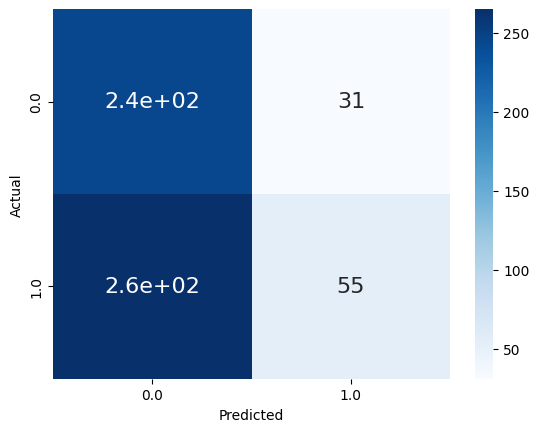

In [223]:
df_cm = pd.DataFrame(confusion_matrix(Y_test, LSTM_predictions), columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font sizes

<a id='6.2'></a>
## 7.2. RF Results on the Test Dataset

In [205]:
# Prepare model
model = RandomForestClassifier(criterion='gini', n_estimators=60,max_depth=5,n_jobs=-1, random_state=42) # rbf is default kernel
#model = LogisticRegression() 
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=60, n_jobs=-1, random_state=42)

In [206]:
# estimate accuracy on validation set
predictions = model.predict(scaled_test_data)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.46218487394957986
[[275   0]
 [320   0]]
              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63       275
         1.0       0.00      0.00      0.00       320

    accuracy                           0.46       595
   macro avg       0.23      0.50      0.32       595
weighted avg       0.21      0.46      0.29       595



<a id='6.3'></a>
## 7.3. Variable Intuition/Feature Importance
Let us look into the Feature Importance of the model

Text(0.5, 0, 'Variable Importance')

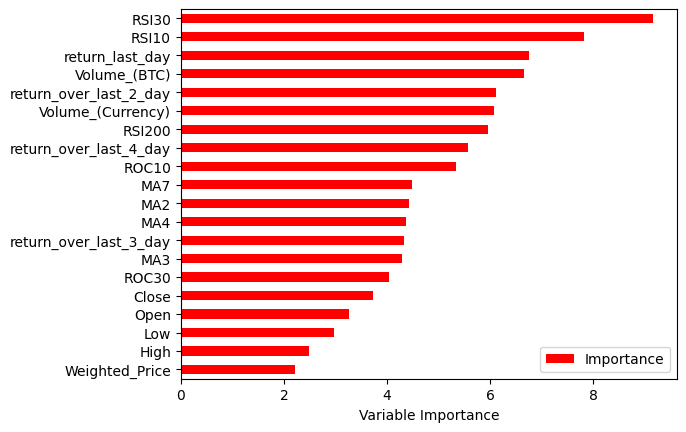

In [178]:
params = np.reshape(model.feature_importances_, (look_back, -1))
reduced = np.sum(params, axis=0)
Importance = pd.DataFrame({'Importance':(reduced*100)}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r' )
plt.xlabel('Variable Importance')

<a id='7'></a>
## 8. Backtesting Results

**# Q4-1 (buy and hold)**

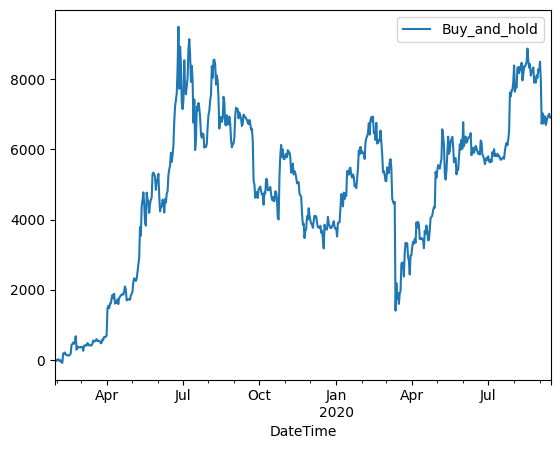

In [183]:
dataset_pred =  dataset.iloc[-X_test.shape[0]:]
df_strategies = pd.DataFrame(index = dataset_pred.index)

# the first open price
Y1 = dataset_pred['Close'] - dataset_pred['Open'].iloc[0]
df_strategies['Buy_and_hold'] = Y1
df_strategies['Buy_and_hold'].plot()
plt.legend(['Buy_and_hold'])
plt.show()

**# Q4-2 (RSI)**

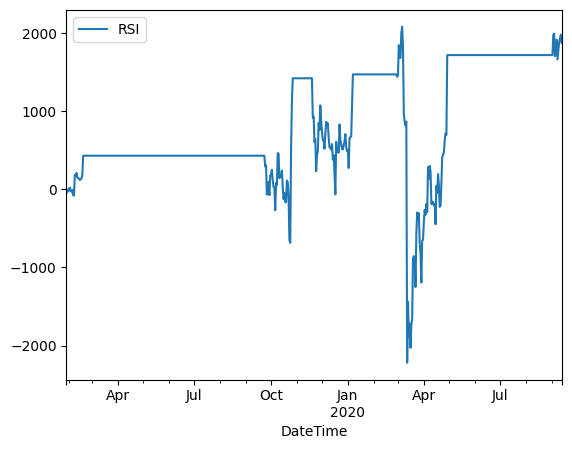

In [192]:
# if position = 1, then do not buy
# if position = 0, then do not sell
# 画每个阶段的
# I set the transaction cost as 0.2% of the total fee
transFeeRate = 0.002

def tradeByRSI10(Period):
  DelPrices = [0]
  position = 1
  in_price = dataset_pred['Open'].iloc[0]
  accDelPri = 0 #accumulative dleta price
  for t in range(Period-1):
    # if holding
    if position == 1:
      # buy signal
      if dataset_pred.iloc[t]['RSI10'] >=70:
        tDelPrice = accDelPri + (dataset_pred.iloc[t + 1]['Open'] * (1 - transFeeRate) - in_price)
        accDelPri = tDelPrice
        position = 0
      else:
        tDelPrice = accDelPri + (dataset_pred.iloc[t]['Close'] * (1 - transFeeRate) - in_price)
    # if not holding
    else:
      # sell signal
      if dataset_pred.iloc[t]['RSI10'] <= 30:
        in_price = dataset_pred.iloc[t + 1]['Open']
        tDelPrice = accDelPri + dataset_pred.iloc[t + 1]['Close']*(1-transFeeRate) - dataset_pred.iloc[t + 1]['Open'] * (1+transFeeRate)
        position = 1
      else:
        tDelPrice = accDelPri
    DelPrices.append(tDelPrice)
  # if at the moment still holding
  if position == 1:
    tDelPrice = accDelPri + (dataset_pred.iloc[Period-1]['Close'] * (1 - transFeeRate) - in_price)
  else:
    tDelPrice = accDelPri
  DelPrices.append(tDelPrice)
  return DelPrices[1:]

Y2 = tradeByRSI10(dataset_pred.shape[0])
df_strategies['RSI'] = Y2
df_strategies['RSI'].plot()
plt.legend(['RSI'])
plt.show()

**# Q4-3 (Machine Learning)**

In [224]:
LSTM_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [225]:
print("LSTM prediction counts:\n")
print("Values Counts")
print(pd.DataFrame(LSTM_predictions).value_counts())

LSTM prediction counts:

Values Counts
0    509
1     86
dtype: int64


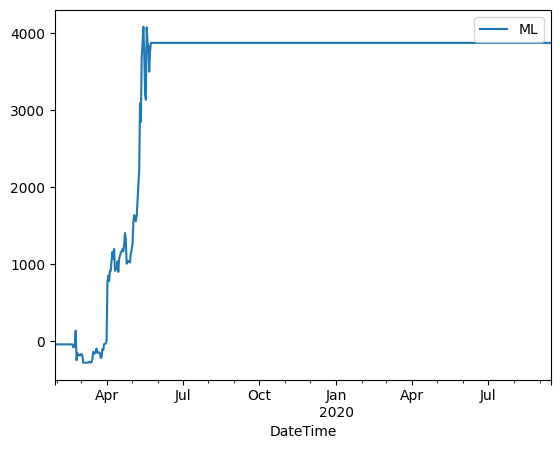

In [226]:
# if position = 1, then do not buy
# if position = 0, then do not sell

# If the predictions are all 1, and we want the input exactly the same 
# as the buy and hold strategy, we need to set transaction cost to 0.
#transFeeRate = 0
#predictions = [1 for _ in range(dataset_pred.shape[0])]

def tradeByML(Period, predictions):
  DelPrices = [0]
  position = 1
  in_price = dataset_pred['Open'].iloc[0]
  accDelPri = 0 #accumulative dleta price
  for t in range(Period-1):
    #if holding
    if position == 1:
      # if the signal shows sell
      if predictions[t] == 0:
        tDelPrice = accDelPri + (dataset_pred.iloc[t + 1]['Open'] * (1 - transFeeRate) - in_price)
        accDelPri = tDelPrice
        position = 0
      else:
        tDelPrice = accDelPri + (dataset_pred.iloc[t]['Close'] * (1 - transFeeRate) - in_price)
    #if not holding
    else:
      # if the signal shows sell
      if predictions[t] == 1: 
        in_price = dataset_pred.iloc[t + 1]['Open'] #update buy in price
        tDelPrice = accDelPri + dataset_pred.iloc[t + 1]['Close']*(1-transFeeRate) - dataset_pred.iloc[t + 1]['Open'] * (1+transFeeRate)
        position = 1
      else:
        tDelPrice = accDelPri
    DelPrices.append(tDelPrice)
  # if at the moment still holding
  if position == 1:
    tDelPrice = accDelPri + (dataset_pred.iloc[Period-1]['Close'] * (1 - transFeeRate) - in_price)
  else:
    tDelPrice = accDelPri
  DelPrices.append(tDelPrice)
  return DelPrices[1:]

Y3 = tradeByML(dataset_pred.shape[0], LSTM_predictions)
df_strategies['ML'] = Y3
df_strategies['ML'].plot()
plt.legend(['ML'])
plt.show()

In [210]:
signal_RSI = [1 for _ in range(dataset_pred.shape[0])]
for i in range(dataset_pred.shape[0]):
  if dataset_pred.iloc[i]['RSI10'] >=70:
    signal_RSI[i] = 0
  elif dataset_pred.iloc[i]['RSI10'] <= 30:
    signal_RSI[i] = 1
  else:
    signal_RSI[i] = signal_RSI[i-1]

<Axes: xlabel='DateTime'>

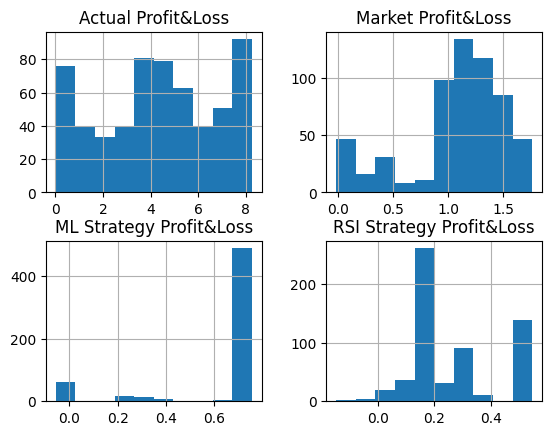

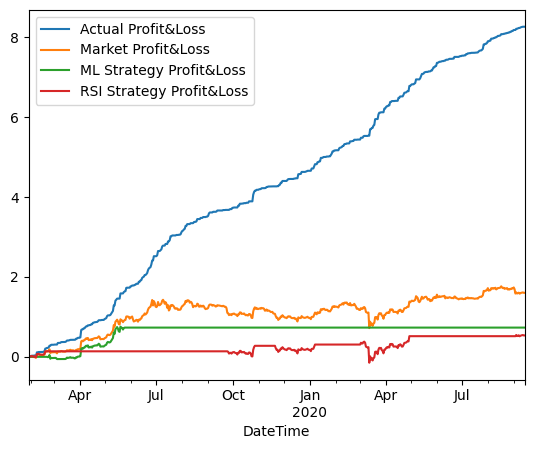

In [228]:
# Create column for Strategy Returns by multiplying the daily returns by the position that was held at close of business the previous day
backtestdata = pd.DataFrame(index=dataset_pred.index)
# signal = 1: buy
# signal = 0: sell
# backtestdata = pd.DataFrame()
#backtestdata['signal_ML'] = predictions
backtestdata['signal_ML'] = LSTM_predictions
backtestdata['signal_actual'] = Y_test
backtestdata['signal_RSI'] = signal_RSI
backtestdata['Market Profit&Loss'] = X['Close'][look_back:].pct_change()
backtestdata['Actual Profit&Loss'] = backtestdata['Market Profit&Loss'] * backtestdata['signal_actual'].shift(1)
backtestdata['ML Strategy Profit&Loss'] = backtestdata['Market Profit&Loss'] * backtestdata['signal_ML'].shift(1)
backtestdata['RSI Strategy Profit&Loss'] = backtestdata['Market Profit&Loss'] * backtestdata['signal_RSI'].shift(1)

#backtestdata=backtestdata.reset_index()
backtestdata.head()
backtestdata[['Actual Profit&Loss', 'Market Profit&Loss', 'ML Strategy Profit&Loss','RSI Strategy Profit&Loss']].cumsum().hist()
backtestdata[['Actual Profit&Loss', 'Market Profit&Loss', 'ML Strategy Profit&Loss','RSI Strategy Profit&Loss']].cumsum().plot()

In [214]:
#if ML signals are all 1, then it is buy and hold.
df_strategies['ML'] - df_strategies['Buy_and_hold']

DateTime
2019-01-29    0.0
2019-01-30    0.0
2019-01-31    0.0
2019-02-01    0.0
2019-02-02    0.0
             ... 
2020-09-10    0.0
2020-09-11    0.0
2020-09-12    0.0
2020-09-13    0.0
2020-09-14    0.0
Freq: D, Length: 595, dtype: float64